# Predicting social media performance metrics of posts published in brands' Facebook page, using Regression analysis

The data is related to posts' published during the year of 2014 on the Facebook's page of a renowned cosmetics brand. 
This dataset contains 500 of the 790 rows. The remaining were omitted due to confidentiality issues. The data includes 7 features known prior to post publication and 12 features for evaluating post impact and available at : https://archive.ics.uci.edu/ml/datasets/Facebook+metrics

The task here is to perform predictive anlaytics on the data to predict the following out of 12 using the 7 features prior to post publication :
1. 

The task is to build regression models to predict the parameter Total Interactions using
Page total likes, Type , Category, Post Month, Post Hour, Post Weekday  and Paid. Lets begin by importing the libraries.

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline 

Now read in and preview the dataset

In [2]:
#Importing the dataset
dataset = pd.read_csv("dataset_Facebook.csv", sep =';')

In [3]:
dataset.head(10)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


Lets extract the relevant features only

In [4]:
dataset = dataset[['Page total likes','Type','Category','Post Month','Post Weekday','Post Hour','Paid','Lifetime Post Total Reach',
                  'Lifetime Post Total Impressions','Lifetime Post Consumers','Total Interactions']]

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Page total likes                   500 non-null int64
Type                               500 non-null object
Category                           500 non-null int64
Post Month                         500 non-null int64
Post Weekday                       500 non-null int64
Post Hour                          500 non-null int64
Paid                               499 non-null float64
Lifetime Post Total Reach          500 non-null int64
Lifetime Post Total Impressions    500 non-null int64
Lifetime Post Consumers            500 non-null int64
Total Interactions                 500 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 43.0+ KB


Observe that the `Paid` variable has one NaN. Lets substitute it with a commonly occruing value, 1

In [6]:
dataset['Paid'].tail(10)

490    0.0
491    1.0
492    0.0
493    0.0
494    0.0
495    0.0
496    0.0
497    0.0
498    0.0
499    NaN
Name: Paid, dtype: float64

In [7]:
dataset.iloc[499,6] = 0.0

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Page total likes                   500 non-null int64
Type                               500 non-null object
Category                           500 non-null int64
Post Month                         500 non-null int64
Post Weekday                       500 non-null int64
Post Hour                          500 non-null int64
Paid                               500 non-null float64
Lifetime Post Total Reach          500 non-null int64
Lifetime Post Total Impressions    500 non-null int64
Lifetime Post Consumers            500 non-null int64
Total Interactions                 500 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 43.0+ KB


The target variable is `Total Interactions`

In [9]:
total_interactions = 'Total Interactions'

## Feature Analysis

Lets now take a look at our features

In [10]:
sns.set_palette("hls",2)

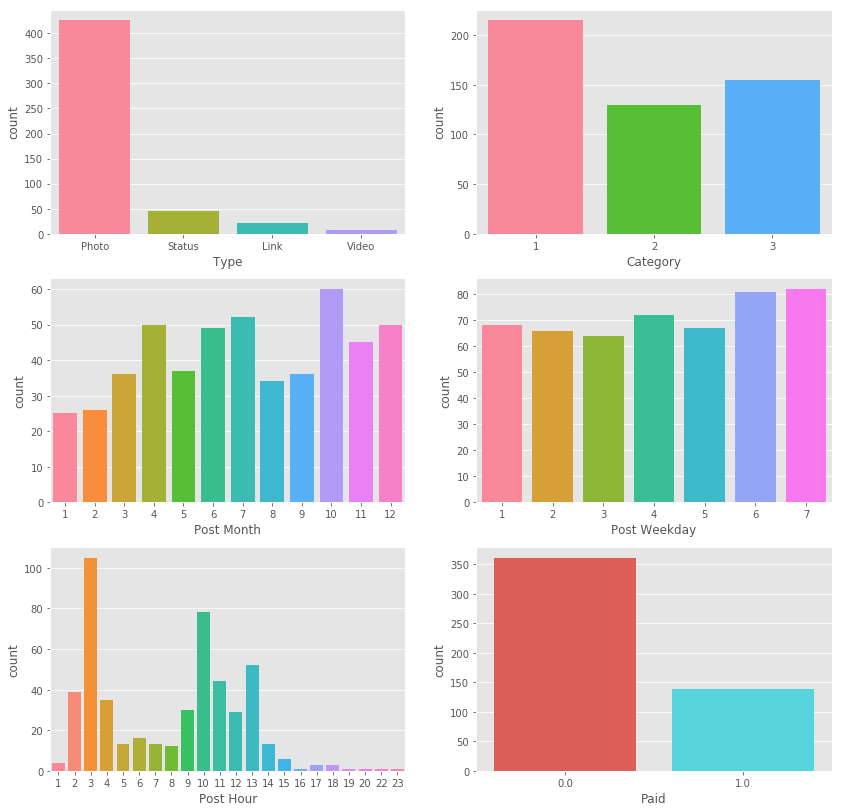

In [11]:
# Create a figure instance, and the subplots
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.countplot(x="Type",data=dataset,ax=ax1,saturation=1)
sns.countplot(x="Category",data=dataset,ax=ax2,saturation=1)
sns.countplot(x="Post Month",data=dataset,ax=ax3,saturation=1)
sns.countplot(x="Post Weekday",data=dataset,ax=ax4,saturation=1)
sns.countplot(x="Post Hour",data=dataset,ax=ax5,saturation=1)
sns.countplot(x="Paid",data=dataset,ax=ax6,saturation=1)

The countplot for `Type` show a higher vote for the `Photo` followed by `Status`. `Link` has half as that of count as `Status`. `Category`, `Post Month`, `Post Hour`, `Post Weekday` and `Paid` do have some variability in their classes

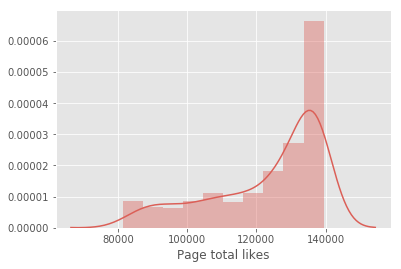

In [12]:
sns.distplot(dataset['Page total likes'])

The `Page Total likes` is distributed largely in the range 120000 to 140000

In [13]:
dataset.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Post Consumers,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,5.000000e+02,500.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278000,13903.36000,2.958595e+04,798.772000,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448462,22740.78789,7.680325e+04,882.505013,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,332.500000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,551.500000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,955.500000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11328.000000,6334.000000


Observe that the variables are not standardized (different mean and stadard deviation). So we might do some feature scaling for the model.

### Encoding categorical data

Lets encode the categorical variables using the `get_dummies` in Pandas

In [14]:
# Encoding categorical data
dataset = pd.get_dummies(dataset, columns=["Type","Category", "Post Month", "Post Weekday", "Post Hour"])

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 54 columns):
Page total likes                   500 non-null int64
Paid                               500 non-null float64
Lifetime Post Total Reach          500 non-null int64
Lifetime Post Total Impressions    500 non-null int64
Lifetime Post Consumers            500 non-null int64
Total Interactions                 500 non-null int64
Type_Link                          500 non-null uint8
Type_Photo                         500 non-null uint8
Type_Status                        500 non-null uint8
Type_Video                         500 non-null uint8
Category_1                         500 non-null uint8
Category_2                         500 non-null uint8
Category_3                         500 non-null uint8
Post Month_1                       500 non-null uint8
Post Month_2                       500 non-null uint8
Post Month_3                       500 non-null uint8
Post Month_4                 

Observe that the dataset now has 54 columns in total, so lets choose X by omitting one dummy variable from each category. y variable is the `total_interactions` variable

In [16]:
X = dataset.drop(['Lifetime Post Total Reach','Lifetime Post Total Impressions','Lifetime Post Consumers', total_interactions,'Category_1','Type_Video',
                 'Post Month_1','Post Weekday_1','Post Hour_23'], axis = 1)
y = dataset[[total_interactions]]

### Feature Scaling

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

### Splitting the dataset into the Training set and Test set

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Since the number of features is large, lets do some Dimensionalty reduction using PCA technique.

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [22]:
explained_variance

array([ 0.06422556,  0.0459434 ])

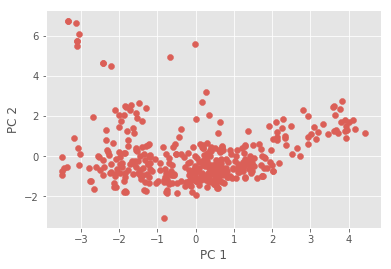

In [22]:
plt.scatter(X_train[:,0],X_train[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

The above plot shows the two Principal Components extracted from the data, plotted against each other. The variations are not very linear as can be seen.

We will build three models : 
   1. Linear Regression
   2. Polynomial Regression
   3. Support Vector Regression

In [24]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
#Making Predictions
y_pred_linear_reg = linear_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error=mean_squared_error(y_test, y_pred_linear_reg)
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mean_squared_error))

Mean Squared Error(MSE) of the test set: 0.495 


In [25]:
# POLYNOMIAL REGRESSION
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
p_reg = LinearRegression()
p_reg.fit(X_poly_train, y_train)

y_pred_preg = p_reg.predict(X_poly_test)

from sklearn.metrics import mean_squared_error
msepolyreg=mean_squared_error(y_test, y_pred_preg)
print("Mean Squared Error(MSE) of the test set using Polynomial Regression: {:.3f} ".format(msepolyreg))
    

Mean Squared Error(MSE) of the test set using Polynomial Regression: 0.486 


In [26]:
# SUPPORT VECTOR REGRESSION
from sklearn.svm import SVR
sv_reg = SVR(kernel ='rbf')
sv_reg.fit(X_train, y_train.ravel())
    
y_pred_svreg = sv_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
msesvr = mean_squared_error(y_test, y_pred_svreg)
print("Mean Squared Error(MSE) of the test set using Support Vector Regression: {:.3f} ".format(msesvr))

Mean Squared Error(MSE) of the test set using Support Vector Regression: 0.501 


## Concluding Remarks

1. Three predctive models to predict the variable `Total Interactions` from the features prior to the posts has been made. 
2. Principal Components has been extracted, and Support vector regression, being a robust method, could produce slightly better accuracy comapred to others.